## Bag of Words

In [1]:
# Importando bibliotecas e funções
from libs import *
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\domaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


O Bag of Words é uma técnica de representação textual (neste caso, títulos e descrições de vídeos) é representado como um vetor que contém a contagem das frequências das palavras no vocabulário. Essa abordagem trata o texto como uma "sacola" de palavras, onde a ordem das palavras é ignorada e apenas as frequências são consideradas.

In [2]:
# Exemplo de texto
sample_text = ["Exemplo",
               "Palavra exemplo",
               "Exemplo de palavra (palavra)"]

# Criando uma instância do CountVectorizer
count_vectorizer = CountVectorizer(max_features=100)  

# Ajustando e transformando o texto
text_transformed = count_vectorizer.fit_transform(sample_text)

# Convertendo a matriz esparsa em uma matriz densa para visualizar
text_transformed_dense = text_transformed.toarray()

# Mostrando os textos exemplo
print("\nExemplos de texto:")
print(sample_text)

# Visualizando palavras-chave
feature_names = count_vectorizer.get_feature_names_out()
print("\nPalavras-chave:")
print(feature_names)

# Exibindo os resultados
print("\nMatriz: 'de', 'exemplo', 'palavra'")
print(text_transformed_dense)


Exemplos de texto:
['Exemplo', 'Palavra exemplo', 'Exemplo de palavra (palavra)']

Palavras-chave:
['de' 'exemplo' 'palavra']

Matriz: 'de', 'exemplo', 'palavra'
[[0 1 0]
 [0 1 1]
 [1 1 2]]


Cada coluna representa uma palavra-chave, cada linha representa um texto e os valores nas células indicam a frequência com que cada palavra-chave aparece em cada texto.

Neste exemplo apresentado:

- No primeiro texto ('Exemplo'), a palavra 'de' não aparece ('0'), 'exemplo' aparece uma vez ('1'), e 'palavra' não aparece ('0').
- No segundo texto ('Palavra exemplo'), 'de' não aparece ('0'), 'exemplo' aparece uma vez ('1'), e 'palavra' também aparece uma vez ('1').
- No terceiro texto ('Exemplo de palavra (palavra)'), 'de' aparece uma vez ('1'), 'exemplo' aparece uma vez ('1'), e 'palavra' aparece duas vezes ('2').

1. Carregando base de dados em um DataFrame do Pandas.

In [3]:
# Definindo dataframe preprocessado antes dos pipelines
df_bow = pd.read_csv('data/data3.csv')

In [4]:
# Amostra de 10%
#df_bow = df_bow.sample(frac=0.1, random_state=42) 

In [5]:
# Dimensões
df_bow.shape

(36642, 18)

In [6]:
# Definindo colunas numéricas, categóricas e textuais
numeric_features = ['year', 'video_count', 'view_count_x', 'subscriber_count', 
                    'aux_status', 'comment_count_y','dislike_count', 'view_count_y',
                        'like_count', 'video_duration', 'published_at']

categorical_features = ['channel_id','category', 'gender']

textual_features = ['video_title', 'video_desc']

In [7]:
# Substituindo valores nulos por uma string vazia
df_bow[textual_features] = df_bow[textual_features].fillna('')

2. Dividindo os dados em treino e teste, de maneira a evitar vazamento de dados (data leakage).

In [8]:
# Separando features (X) e alvo (y)
#X = df_bow[textual_features + categorical_features] 
X = df_bow[textual_features]
y = df_bow['popularity']

# Dividindo os dados em treino e teste
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.3, random_state=42)

3. Aplicando `OneHotEncoder` nas colunas categóricas e transformando matriz.

In [9]:
"""
# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_bow_categorical = encoder.fit_transform(X_train_bow[categorical_features])
X_test_bow_categorical = encoder.transform(X_test_bow[categorical_features])

# 3 features categóricas representadas em matriz esparsa
print(X_train_bow_categorical[0])

# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro
X_train_bow_categorical = X_train_bow_categorical.toarray()
X_test_bow_categorical = X_test_bow_categorical.toarray()
"""

"\n# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'\nencoder = OneHotEncoder(handle_unknown='ignore')\n\nX_train_bow_categorical = encoder.fit_transform(X_train_bow[categorical_features])\nX_test_bow_categorical = encoder.transform(X_test_bow[categorical_features])\n\n# 3 features categóricas representadas em matriz esparsa\nprint(X_train_bow_categorical[0])\n\n# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro\nX_train_bow_categorical = X_train_bow_categorical.toarray()\nX_test_bow_categorical = X_test_bow_categorical.toarray()\n"

4. Iniciando `CountVectorizer()` para a criação de representações Bag of Words.

In [10]:
# Criando uma instância do CountVectorizer
count_vectorizer = CountVectorizer(max_features=100) 

In [11]:
# Definindo valores dos títulos de treino e de teste
bow_title_train = X_train_bow['video_title'].values
bow_title_test = X_test_bow['video_title'].values

In [12]:
# Exemplo de título separado para treino
bow_title_train[0]

'galaxy a20 v moto g8 play falta memória põe tudo perder'

In [13]:
# Definindo valores das descrições de treino e de teste
bow_desc_train = X_train_bow['video_desc'].values
bow_desc_test = X_test_bow['video_desc'].values

In [14]:
# Exemplo de descrição separado para treino
bow_desc_train[0]

'inscrevase vídeos ofertas moto g8 play'

5. Transformando os títulos e descrições dos conjuntos de treino e teste usando o CountVectorizer() 

In [15]:
# Ajustando e transformando os titulos
X_train_bow_title = count_vectorizer.fit_transform(bow_title_train)
X_test_bow_title = count_vectorizer.transform(bow_title_test)

In [16]:
# Convertendo a matriz esparsa em uma matriz densa para visualizar
X_train_bow_title = X_train_bow_title.toarray()
X_test_bow_title = X_test_bow_title.toarray()

In [17]:
print(X_train_bow_title[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
# Ajustando e transformando as descrições
X_train_bow_desc = count_vectorizer.fit_transform(bow_desc_train)
X_test_bow_desc = count_vectorizer.transform(bow_desc_test)

In [19]:
# Convertendo a matriz esparsa em uma matriz densa para visualizar
X_train_bow_desc = X_train_bow_desc.toarray()
X_test_bow_desc = X_test_bow_desc.toarray()

In [20]:
print(X_train_bow_desc[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [21]:
#print(X_train_bow_numeric.shape)
#print(X_train_bow_categorical.shape)
print(X_train_bow_title.shape)
print(X_train_bow_desc.shape)

(25649, 100)
(25649, 100)


6. Concatenando através de `np.hstack` as features transformadas para treino e teste.

Para concatenar as matrizes transformadas, `np.hstack`(Horizontal Stack) é uma função usada para empilhar matrizes horizontalmente, ou seja, ao longo das colunas. Portanto, as matrizes precisam ter o mesmo número de linhas (amostras) para serem concatenadas, como verificado na célula acima.

In [22]:
# Concatenando todas as features processadas
X_train_bow_preprocessed = np.hstack((X_train_bow_title,
                                      X_train_bow_desc))

X_test_bow_preprocessed = np.hstack((X_test_bow_title,
                                     X_test_bow_desc))

6. Treinando e testando o modelo de classificação multiclasse.

In [23]:
# Instanciando modelo para classificação multiclasse
model = SVC(class_weight='balanced', random_state=42)

# Treinando modelo com dados de treino
model.fit(X_train_bow_preprocessed, y_train_bow)

# Testando modelo nos dados de teste
prediction = model.predict(X_test_bow_preprocessed)

7. Imprimindo relatório das métricas de avaliação e matriz de confusão.

In [24]:
# Imprimindo métricas de avaliação do modelo
print('\nRelatório de Classificação:')
cr_bow = classification_report(y_test_bow, prediction)
print(cr_bow)

print('\nMatriz de Confusão:')
cm_bow = confusion_matrix(y_test_bow, prediction)
print(cm_bow)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      6140
           1       0.51      0.45      0.48      3372
           2       0.27      0.56      0.36      1481

    accuracy                           0.56     10993
   macro avg       0.52      0.55      0.51     10993
weighted avg       0.63      0.56      0.58     10993


Matriz de Confusão:
[[3871 1045 1224]
 [ 837 1505 1030]
 [ 248  403  830]]


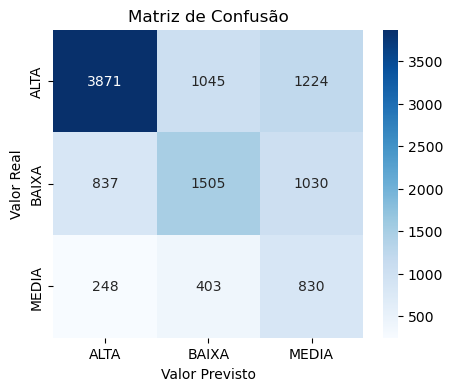

In [25]:
# Plotando a matriz de confusão como heatmap
labels = ['ALTA', 'BAIXA', 'MEDIA']
plot_confusion_matrix(y_test_bow, prediction, labels)